#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행 
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.
        * 성능 가이드
            * Accuracy : 0.900~0.968

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/Desktop/'
path = 'C:/Users/wl/Desktop/본수업 시작/미니프로젝트/3차 - 240404/1일차/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [234]:
# from google.colab import drive
# drive.mount('/content/drive')

In [235]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 불러오기

#### 1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

# 필요하다고 판단되는 라이브러리를 추가하세요.

#### 2) 제공 함수 생성
* 변수 중요도를 시각화할 수 있는 함수를 제공합니다.
* 입력 : 
    * importance : 트리모델의 변수 중요도(예: model.feature_importances_)
    * names : 변수 이름 목록(예 : x_train.columns
    * result_only  : 변수 중요도 순으로 데이터프레임만 return할지, 그래프도 포함할지 결정. False이면 결과 데이터프레임 + 그래프
    * topn : 중요도 상위 n개만 표시. all 이면 전체.
* 출력 : 
    * 중요도 그래프 : 중요도 내림차순으로 정렬
    * 중요도 데이터프레임 : 중요도 내림차순으로 정렬

In [3]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (3) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
    * data01_test.csv : 테스트용
    * feature.csv : feature 이름을 계층구조로 정리한 데이터

* 세부 요구사항
    * 칼럼 삭제 : data01_train.csv와 data01_test.csv 에서 'subject' 칼럼은 불필요하므로 삭제합니다.

#### 1) 데이터로딩

In [4]:
df_train = pd.read_csv(path +'data01_train.csv')
df_test = pd.read_csv(path +'data01_test.csv')
df_feature = pd.read_csv(path +'features.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


In [239]:
# df=pd.read_csv('df_feature_imp_total.csv')
# df

#### 2) 기본 정보 조회

In [240]:
df_train.shape

(5881, 563)

In [241]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594,17.381568
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479,8.938316
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143,1.000000
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555,8.000000
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951,19.000000
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000,30.000000


In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 25.3+ MB


## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다. 


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [243]:
x = df_train.drop('Activity', axis=1)
y = df_train['Activity']

In [244]:
y

0                 STANDING
1                   LAYING
2                 STANDING
3                  WALKING
4       WALKING_DOWNSTAIRS
               ...        
5876               SITTING
5877      WALKING_UPSTAIRS
5878                LAYING
5879      WALKING_UPSTAIRS
5880               SITTING
Name: Activity, Length: 5881, dtype: object

* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [245]:
# train/test 분리 후가 맞음

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [246]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=1)
x_train_s, x_val_s, y_train_s, y_val_s = train_test_split(x_s, y, test_size=0.3, shuffle=True, random_state=1)

In [ ]:
# train/test 분리 후가 맞음
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test) 

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다. 
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.

### (1) Random Forest Classifier

#### 1) 전체 변수

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_val)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[330   0   0   0   0   1]
 [  0 279  13   0   0   0]
 [  0  11 320   0   0   0]
 [  0   0   0 293   2   2]
 [  0   0   0   1 234   4]
 [  0   0   0   1   4 270]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.96      0.96      0.96       292
          STANDING       0.96      0.97      0.96       331
           WALKING       0.99      0.99      0.99       297
WALKING_DOWNSTAIRS       0.97      0.98      0.98       239
  WALKING_UPSTAIRS       0.97      0.98      0.98       275

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



In [248]:
result = {}
result['Random Forest'] = accuracy_score(y_val, y_pred)
result

{'Random Forest': 0.9779036827195468}

In [249]:
r = plot_feature_importance(model_rf.feature_importances_, list(x_train), True)
r.head()

,feature_name,feature_importance
0,tGravityAcc-max()-X,0.038724
1,tGravityAcc-energy()-X,0.033123
2,tGravityAcc-mean()-Y,0.029577
3,tGravityAcc-mean()-X,0.028061
4,tGravityAcc-min()-X,0.025748


In [250]:
# model_dt = DecisionTreeClassifier()
# model_dt.fit(x_train, y_train)
# y_pred = model_dt.predict(x_val)

# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [251]:
# model_xgb = XGBClassifier()
# model_xgb.fit(x_train, y_train)
# y_pred = model_xgb.predict(x_val)

# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [252]:
# model_lgbm = LGBMClassifier()
# model_lgbm.fit(x_train, y_train)
# y_pred = model_lgbm.predict(x_val)

# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

#### 2) (옵션)적절히 선택한 변수
* 변수 중요도 상위 100로 결정해서 모델링 해보기
* 변수 중요도 상위 1 ~ 400 까지 변수를 하나씩 늘려가며 모델링 및 성능 비교

In [253]:
r.loc[:99, 'feature_name']

0              tGravityAcc-max()-X
1           tGravityAcc-energy()-X
2             tGravityAcc-mean()-Y
3             tGravityAcc-mean()-X
4              tGravityAcc-min()-X
                  ...             
95            tBodyAccJerk-std()-X
96               tBodyGyro-iqr()-X
97              fBodyAccMag-mean()
98        tBodyAccJerkMag-energy()
99    fBodyAcc-bandsEnergy()-17,24
Name: feature_name, Length: 100, dtype: object

In [254]:
df = pd.DataFrame()
df['feature'] = list(x)
df['Importances'] = model_rf.feature_importances_
df.sort_values(by = 'Importances', ascending=False, inplace=True)
df[:100]

,feature,Importances
49,tGravityAcc-max()-X,0.038724
56,tGravityAcc-energy()-X,0.033123
41,tGravityAcc-mean()-Y,0.029577
40,tGravityAcc-mean()-X,0.028061
52,tGravityAcc-min()-X,0.025748
...,...,...
83,tBodyAccJerk-std()-X,0.002472
139,tBodyGyro-iqr()-X,0.002402
502,fBodyAccMag-mean(),0.002371
232,tBodyAccJerkMag-energy(),0.002364


In [255]:
df.iloc[:100,0]

49              tGravityAcc-max()-X
56           tGravityAcc-energy()-X
41             tGravityAcc-mean()-Y
40             tGravityAcc-mean()-X
52              tGravityAcc-min()-X
                   ...             
83             tBodyAccJerk-std()-X
139               tBodyGyro-iqr()-X
502              fBodyAccMag-mean()
232        tBodyAccJerkMag-energy()
304    fBodyAcc-bandsEnergy()-17,24
Name: feature, Length: 100, dtype: object

In [256]:
top100_lst = list(df.iloc[:100,0])

In [257]:
top100_lst[:10]

['tGravityAcc-max()-X',
 'tGravityAcc-energy()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-X',
 'tGravityAcc-min()-X',
 'angle(Y,gravityMean)',
 'tGravityAcc-min()-Y',
 'angle(X,gravityMean)',
 'tGravityAcc-max()-Y',
 'tGravityAcc-energy()-Y']

In [258]:
top400_lst = list(df.iloc[:400,0])
top400_lst[:10]

['tGravityAcc-max()-X',
 'tGravityAcc-energy()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-X',
 'tGravityAcc-min()-X',
 'angle(Y,gravityMean)',
 'tGravityAcc-min()-Y',
 'angle(X,gravityMean)',
 'tGravityAcc-max()-Y',
 'tGravityAcc-energy()-Y']

In [259]:
x_train100 = x_train[top100_lst]
x_val100 = x_val[top100_lst]
y = df_train['Activity']

# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=1)

model_rf = RandomForestClassifier()
model_rf.fit(x_train100, y_train)
y_pred = model_rf.predict(x_val100)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[331   0   0   0   0   0]
 [  0 282  10   0   0   0]
 [  0  13 318   0   0   0]
 [  0   0   0 291   3   3]
 [  0   0   0   3 232   4]
 [  0   0   0   0   1 274]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.96      0.97      0.96       292
          STANDING       0.97      0.96      0.97       331
           WALKING       0.99      0.98      0.98       297
WALKING_DOWNSTAIRS       0.98      0.97      0.98       239
  WALKING_UPSTAIRS       0.98      1.00      0.99       275

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



* 가장 중요한 변수부터 하나씩 증가시켜가며 모델링 및 accuracy 구하기

In [260]:
# from sklearn.model_selection import train_test_split

# # 중요도 상위 400까지
# # def model_accuracy():

# x = x_train.drop('Activity', axis=1)
# y = x_train['Activity']

# model_rf = RandomForestClassifier()
# model_rf.fit(x_train, y_train)


# df = pd.DataFrame()
# df['feature'] = list(x)
# df['Importances'] = model.feature_importances_
# df.sort_values(by = 'Importances', ascending=False, inplace=True)
# top400_lst = list(df.iloc[:400,0])
# top400_lst[:10]

In [261]:
#중요도 상위 400개로 분류 성능 평가

In [262]:
len(top400_lst)

400

In [263]:
col_added=[]
accuracy_all={}
for col in top400_lst:
    col_added.append(col)
    x_train_2 = x_train[col_added]
    x_val_2 = x_val[col_added]
    # y = df_train['Activity']

#     from sklearn.model_selection import train_test_split
#     x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=1)

    model_rf = RandomForestClassifier()
    model_rf.fit(x_train_2, y_train)
    y_pred = model_rf.predict(x_val_2)
    
    accuracy_all[len(col_added)] = round(accuracy_score(y_val, y_pred), 3)
    
    print(len(col_added), ' : ', accuracy_all[len(col_added)])
    
#     print(confusion_matrix(y_val, y_pred))
#     print(classification_report(y_val, y_pred))

1  :  0.564
2  :  0.653
3  :  0.823
4  :  0.816
5  :  0.84
6  :  0.84
7  :  0.848
8  :  0.878
9  :  0.881
10  :  0.878
11  :  0.916
12  :  0.953
13  :  0.963
14  :  0.964
15  :  0.968
16  :  0.977
17  :  0.974
18  :  0.977
19  :  0.977
20  :  0.979
21  :  0.98
22  :  0.977
23  :  0.98
24  :  0.98
25  :  0.981
26  :  0.979
27  :  0.978
28  :  0.98
29  :  0.979
30  :  0.975
31  :  0.978
32  :  0.98
33  :  0.977
34  :  0.973
35  :  0.976
36  :  0.973
37  :  0.975
38  :  0.973
39  :  0.973
40  :  0.973


KeyboardInterrupt: 

dict_values([0.564, 0.653, 0.823, 0.816, 0.84, 0.84, 0.848, 0.878, 0.881, 0.878, 0.916, 0.953, 0.963, 0.964, 0.968, 0.977, 0.974, 0.977, 0.977, 0.979, 0.98, 0.977, 0.98, 0.98, 0.981, 0.979, 0.978, 0.98, 0.979, 0.975, 0.978, 0.98, 0.977, 0.973, 0.976, 0.973, 0.975, 0.973, 0.973, 0.973])

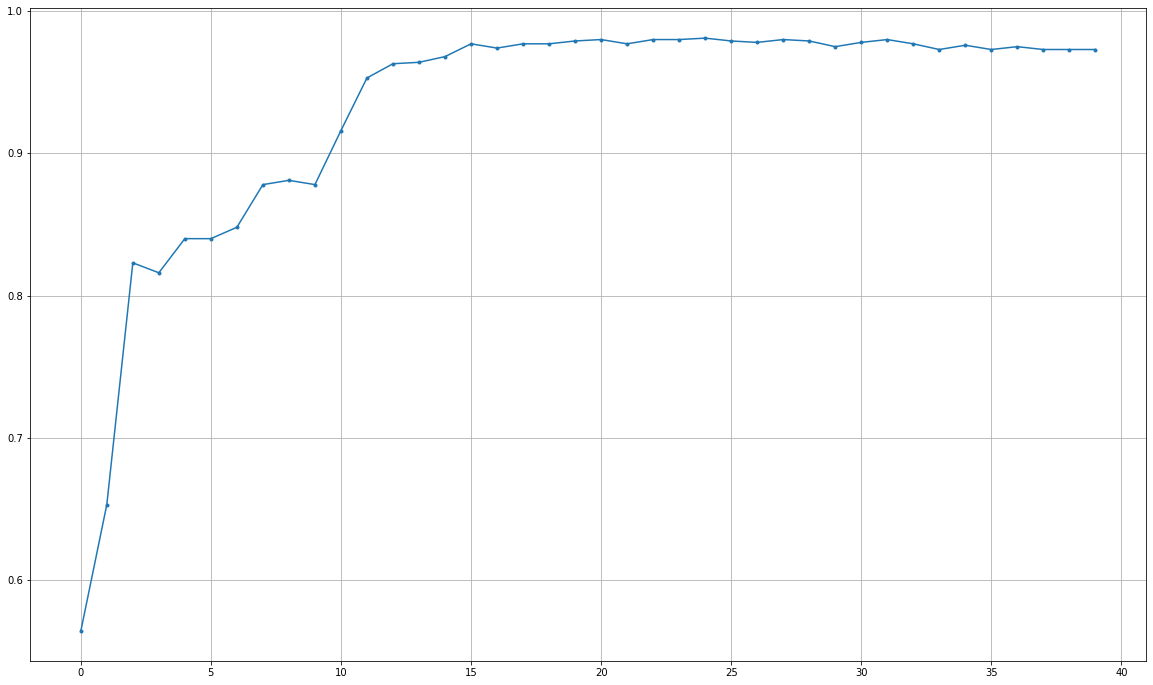

In [271]:
plt.figure(figsize = (20,12))
plt.plot(range(40), accuracy_all.values(), marker = '.')
plt.grid()
plt.show()

* 적절한 지점의 성능에 맞춰 변수 선택 : ==> 30~50개 정도면 충분!

In [99]:
top400_lst[:21]

['tGravityAcc-energy()-X',
 'tGravityAcc-mean()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-min()-Y',
 'angle(Y,gravityMean)',
 'angle(X,gravityMean)',
 'tGravityAcc-max()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-min()-X',
 'tBodyAccJerk-energy()-X',
 'fBodyAcc-mad()-X',
 'fBodyAccMag-mad()',
 'angle(Z,gravityMean)',
 'tGravityAcc-max()-Z',
 'fBodyAccMag-std()',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-arCoeff()-Z,2',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-mad()-X',
 'fBodyAccJerk-std()-X']

### (2) Logistic Regressin

#### 1) 전체 변수

In [276]:
y_train

2196                LAYING
1603    WALKING_DOWNSTAIRS
749                SITTING
3152               WALKING
3271                LAYING
               ...        
905     WALKING_DOWNSTAIRS
5192      WALKING_UPSTAIRS
3980                LAYING
235                WALKING
5157              STANDING
Name: Activity, Length: 4116, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression

m2_1 = LogisticRegression()

m2_1.fit(x_train, y_train)
p2_1 = m2_1.predict(x_val)

NameError: name 'x_train' is not defined

In [273]:
print('accuracy :',accuracy_score(y_val, p2_1))
print('='*60)
print(confusion_matrix(y_val, p2_1))
print('='*60)
print(classification_report(y_val, p2_1))

NameError: name 'p2_1' is not defined

#### 2) (옵션)적절히 선택한 변수
* 변수 중요도 상위 100로 모델링 해보기

In [277]:
feature100 = r.loc[:99, 'feature_name']

In [278]:
x_train100 = x_train[feature100]
x_val100 = x_val[feature100]

In [279]:
m2_2 = LogisticRegression()

m2_2.fit(x_train100, y_train)
p2_2 = m2_2.predict(x_val100)

C:\Users\wl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [280]:
print('accuracy :',accuracy_score(y_val, p2_2))
print('='*60)
print(confusion_matrix(y_val, p2_2))
print('='*60)
print(classification_report(y_val, p2_2))

accuracy : 0.9575070821529745
[[331   0   0   0   0   0]
 [  0 262  30   0   0   0]
 [  0  31 300   0   0   0]
 [  0   0   0 294   1   2]
 [  0   0   0   1 231   7]
 [  0   0   0   3   0 272]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.89      0.90      0.90       292
          STANDING       0.91      0.91      0.91       331
           WALKING       0.99      0.99      0.99       297
WALKING_DOWNSTAIRS       1.00      0.97      0.98       239
  WALKING_UPSTAIRS       0.97      0.99      0.98       275

          accuracy                           0.96      1765
         macro avg       0.96      0.96      0.96      1765
      weighted avg       0.96      0.96      0.96      1765



### (3) SVM

#### 1) kernel = 'rbf'

In [282]:
from sklearn.svm import SVC

#매개변수 C, gamma, kernel 모두 기본값
m3_1 = SVC(C=1, gamma=0.01, kernel = 'rbf', random_state=2022) 
m3_1.fit(x_train, y_train)
p3_1 = m3_1.predict(x_val)

In [283]:
print('accuracy :',accuracy_score(y_val, p3_1))
print('='*60)
print(confusion_matrix(y_val, p3_1))
print('='*60)
print(classification_report(y_val, p3_1))

accuracy : 0.969971671388102
[[331   0   0   0   0   0]
 [  0 267  25   0   0   0]
 [  0  26 305   0   0   0]
 [  0   0   0 296   0   1]
 [  0   0   0   1 238   0]
 [  0   0   0   0   0 275]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.91      0.91      0.91       292
          STANDING       0.92      0.92      0.92       331
           WALKING       1.00      1.00      1.00       297
WALKING_DOWNSTAIRS       1.00      1.00      1.00       239
  WALKING_UPSTAIRS       1.00      1.00      1.00       275

          accuracy                           0.97      1765
         macro avg       0.97      0.97      0.97      1765
      weighted avg       0.97      0.97      0.97      1765



#### 2) kernel = 'linear'

In [284]:
m3_2 = SVC(C=1, gamma=0.01, kernel = 'linear', random_state=2022) 
m3_2.fit(x_train, y_train)
p3_2 = m3_2.predict(x_val)

In [285]:
print('accuracy :',accuracy_score(y_val, p3_2))
print('='*60)
print(confusion_matrix(y_val, p3_2))
print('='*60)
print(classification_report(y_val, p3_2))

accuracy : 0.9875354107648725
[[331   0   0   0   0   0]
 [  0 285   7   0   0   0]
 [  0  15 316   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   0 239   0]
 [  0   0   0   0   0 275]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.95      0.98      0.96       292
          STANDING       0.98      0.95      0.97       331
           WALKING       1.00      1.00      1.00       297
WALKING_DOWNSTAIRS       1.00      1.00      1.00       239
  WALKING_UPSTAIRS       1.00      1.00      1.00       275

          accuracy                           0.99      1765
         macro avg       0.99      0.99      0.99      1765
      weighted avg       0.99      0.99      0.99      1765



#### 3) 하이퍼파라미터 튜닝

* test 전체 수행하기(12 ~ 15분 소요)

In [287]:
from sklearn.model_selection import GridSearchCV

# 딕셔너리 형태로 관심있는 매개변수의 그리드 설정하기
param_grid = {'C': [0.01, 1, 100],
             'gamma': [0.0001, 0.001, 0.1, 1],
              'kernel': ['linear', 'rbf'] }

#생성
# refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재학습시킴. 
model_svc = SVC() 
m3_3= GridSearchCV (model_svc, param_grid, return_train_score=True) #cross-validation 옵션 추가? cv=5

#학습
# train data로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
m3_3.fit(x_train, y_train)

#결과
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(m3_3.cv_results_)

In [288]:
print('최적파라미터:', m3_3.best_params_)
print('='*60)
print('최고성능:', m3_3.best_score_)
print('='*60)

최적파라미터: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
최고성능: 0.9839673111632792


* 예측 및 평가

In [289]:
p3_3 = m3_3.predict(x_val)

In [290]:
print('accuracy :',accuracy_score(y_val, p3_3))
print('='*60)
print(confusion_matrix(y_val, p3_3))
print('='*60)
print(classification_report(y_val, p3_3))

accuracy : 0.9864022662889519
[[331   0   0   0   0   0]
 [  0 285   7   0   0   0]
 [  0  16 315   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   1 238   0]
 [  0   0   0   0   0 275]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.95      0.98      0.96       292
          STANDING       0.98      0.95      0.96       331
           WALKING       1.00      1.00      1.00       297
WALKING_DOWNSTAIRS       1.00      1.00      1.00       239
  WALKING_UPSTAIRS       1.00      1.00      1.00       275

          accuracy                           0.99      1765
         macro avg       0.99      0.99      0.99      1765
      weighted avg       0.99      0.99      0.99      1765



In [ ]:
# 알고리즘 4개